In [0]:
!pip install --upgrade tables
!pip install eli5

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import median_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [7]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [0]:
df=pd.read_hdf("data/car.h5")

In [41]:
df.shape

(106494, 155)

##Dummy Model


In [42]:
df.select_dtypes(np.number).columns 

Index(['price_value', 'car_id'], dtype='object')

In [43]:
feats=["car_id"]
X=df[feats].values
y=df["price_value"].values


model=DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)
mae(y,y_pred)

30365.862562961294

In [44]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [45]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [0]:
df=df[df['price_currency']!='EUR']
df.shape

##Features


In [0]:
SUFFIX_CAT='__cat'

for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorized_values=df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat]=factorized_values
  else:
    df[feat + SUFFIX_CAT]=factorized_values


In [53]:
cat_feats=[x for x in df.columns if SUFFIX_CAT in x]
cat_feats=[x for x in cat_feats if "price" not in x]
len(cat_feats)

151

In [54]:
X=df[cat_feats].values
y=df['price_value'].values


model=DecisionTreeRegressor(max_depth=5)
scores=cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368324

In [56]:
m=DecisionTreeRegressor(max_depth=5)
m.fit(X,y)
imp=PermutationImportance(m,random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)


Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


In [0]:
def group_and_barplot(feat_groupy, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='size', top=50, subplots=True):
 return(
  df
  .groupby(feat_groupy)[feat_agg]
  .agg(agg_funcs)
  .sort_values(by=feat_sort, ascending=False)
  .head(top)
).plot(kind='bar', figsize=(15,5), subplots=subplots)

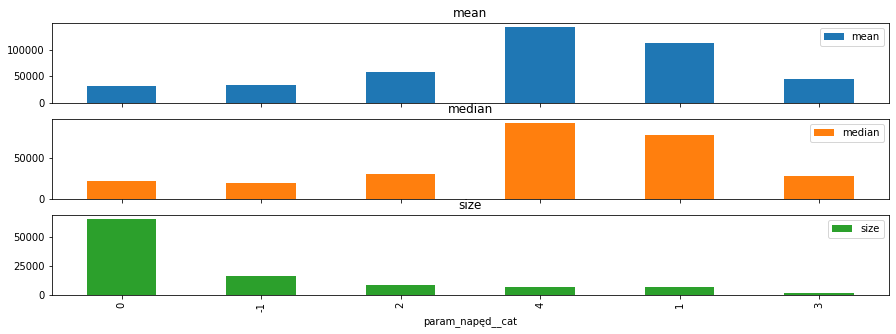

In [61]:
group_and_barplot('param_napęd__cat');